In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

Sigmoid $g(z) = \frac{1}{1+e^{-z}}$

$g(f(x)) = gf(x) = \frac{1}{1+e^{-(w * x + b)}}$

Loss function is different:
$-\frac{1}{m}\sum[y_i * log(gf(x_i,w_{new},b_{new}))+(1-y_i) * log(1-gf(x_i,w_{new},b_{new}))]$

But Gradient Descend will remain the same - see math in here - https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

In [116]:
def GradientDescend(x, y, alpha = 0.01, iterations = 1000):

    def gfx(x,w,b):
        return 1 / (1+np.exp(-(np.dot(x,w)+b)))


    def CostFunction(x,y,w,b):
        m = x.shape[0]

        cost_first_log = np.log(gfx(x,w,b))
        
        cost_second_log = np.log(1 - gfx(x,w,b))

        cost_sum = np.dot(y,cost_first_log) + np.dot((1-y),cost_second_log)
        cost = - cost_sum / m

        return cost


    def ComputeGradient(x,y,w,b):

        loss = gfx(x,w,b) - y
        dJ_dw = np.dot(loss,x) / m
        dJ_db = np.sum(loss) / m

        return dJ_dw, dJ_db

    if x.ndim == 1:
        m = x.shape[0]
        k = 1
    elif x.ndim == 2:
        m,k = x.shape # m samples, k featuress

    if k == 1:
        w_new = 0
    elif k == 2:
        w_new = np.zeros_like(x[0])
    else:
        print("Too many dimensions in the train data")

    b_new = 0

    i = 0

    log = []

    while i < iterations:

        dJ_dw, dJ_db = ComputeGradient(x, y, w_new, b_new)

        w_new = w_new - alpha * dJ_dw
        b_new = b_new - alpha * dJ_db
        cost = CostFunction(x,y,w_new,b_new)

        log.append([i,[w_new,b_new],[dJ_dw,dJ_db],cost])

        i += 1
    
    return w_new, b_new, cost, log


# Train data

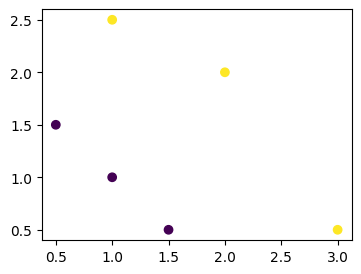

In [102]:
x_train = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y_train = np.array([0,0,0,1,1,1])

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[:,0],x_train[:,1],c=y_train)

In [104]:
w_new, b_new, cost, log = GradientDescend(x_train,y_train, iterations = 10000, alpha = 0.1)

w_new, b_new, cost

(array([5.28123029, 5.07815608]), -14.222409982019839, 0.017117768890292925)

# Predictions

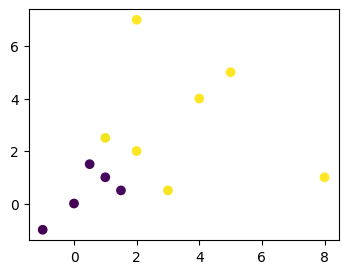

In [108]:
x_test = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5],[0,0],[5,5],[2,7],[8,1],[4,4],[-1,-1]])

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_test[:,0],x_test[:,1],c= 1 / (1+np.exp(-(np.dot(x_test,w_new)+b_new))))

# Test on another set

Text(0, 0.5, 'If_milignant')

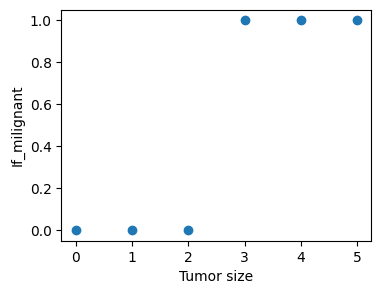

In [123]:
x_train = np.array([0.,1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train,y_train)
ax.set_xlabel("Tumor size")
ax.set_ylabel("If_milignant")

In [118]:
w_new, b_new, cost, log = GradientDescend(x_train,y_train, iterations = 10000, alpha = 0.1)

w_new, b_new, cost

(5.119873496232877, -12.609503113679205, 0.02538226757815515)

Text(0, 0.5, 'If_milignant')

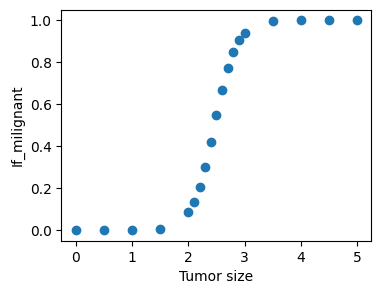

In [124]:
x_test = np.array([0.,0.5,1,1.5,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.5,4,4.5,5])

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_test,1 / (1+np.exp(-(np.dot(x_test,w_new)+b_new))))
ax.set_xlabel("Tumor size")
ax.set_ylabel("If_milignant")